# Preparation des données
### Initialisation du projet

In [28]:
# imports
import numpy as np
import os

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre
random=default_rng(420) 

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# où sauver les figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "projet"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "img") # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=500):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### Importation

In [29]:
import os
import pandas as pd

DATASETS_PATH = os.path.join(".\datasets")

def load_datasets_data(dataset_path=DATASETS_PATH):
	csv_general = pd.read_csv(os.path.join(dataset_path, "general_data.csv"))
	csv_manager = pd.read_csv(os.path.join(dataset_path, "manager_survey_data.csv"))
	csv_employee = pd.read_csv(os.path.join(dataset_path, "employee_survey_data.csv"))
	csv_intime = pd.read_csv(os.path.join(dataset_path, "in_time.csv"))
	csv_outtime = pd.read_csv(os.path.join(dataset_path, "out_time.csv"))
	return csv_general, csv_manager, csv_employee, csv_intime, csv_outtime

In [30]:
general_set, manager_set, employee_set, intime_set, outtime_set = load_datasets_data()

In [31]:
dataset_merge = general_set.merge(employee_set.merge(manager_set, on="EmployeeID"), on="EmployeeID")
dataset = dataset_merge.copy()
pd.DataFrame.head(dataset, 5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


### Nettoyage des données / Complétion

In [32]:
#https://prod.liveshare.vsengsaas.visualstudio.com/join?6712A4B62ABC55A3AC374AFD25A834927C4D

incomplete_attributes = ["NumCompaniesWorked","JobSatisfaction","EnvironmentSatisfaction","WorkLifeBalance", "TotalWorkingYears"]

for attribute in incomplete_attributes:
	median = dataset[attribute].median()
	dataset[attribute].fillna(median, inplace=True) # option 3

#Autre methode
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy="median")

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [34]:
rawArray = ["Age","DistanceFromHome","Education","TotalWorkingYears",
	"TrainingTimesLastYear","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager",
	"EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance","JobInvolvement", "NumCompaniesWorked" ]

dataset_yes = dataset.where(dataset["Attrition"]=="Yes", 0)
dataset_no  = dataset.where(dataset["Attrition"]=="No", 1)

dataset_yes = dataset_yes.loc[dataset_yes["Attrition"] != 0]
dataset_no = dataset_no.loc[dataset_no["Attrition"] != 1]

print("Attrition NO: ", len(dataset_no) ," Attrition YES: ", len(dataset_yes))

print(711/4410*100)
# for col in rawArray:
#     plt.boxplot([dataset_yes[col].apply(np.int64), dataset_no[col].apply(np.int64)])
#     print(col)
#     plt.show()

# for col in rawArray:
# 	print(col)
# 	plt.hist(dataset_yes[col].apply(np.int64), color="red", edgecolor='black', linewidth=1.2,bins=20)
# 	plt.show()
# 	plt.hist(dataset_no[col].apply(np.int64), color="green", edgecolor='black', linewidth=1.2,bins=20)
# 	plt.show()

Attrition NO:  3699  Attrition YES:  711
16.122448979591837


In [35]:
corr_array = ["Age", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager"]


In [127]:
# Data frame is created under column name Name and Attrition
data_frame = pd.DataFrame(dataset, columns=["Attrition"])
 
# Data of Attrition is converted into Binary Data
df_one = pd.get_dummies(data_frame["Attrition"])
 
# Binary Data is Concatenated into Dataframe
df_two = pd.concat((df_one, data_frame), axis=1)
 
# Attritioncolumn is dropped
df_two = df_two.drop(["Attrition"], axis=1)
 
# We want Male =0 and Female =1 So we drop Male column here
df_two = df_two.drop(["No"], axis=1)
 
# Rename the Column
result = df_two.rename(columns={"Yes": "Attrition"})

dataset_test = dataset.copy()
attrition = result["Attrition"]

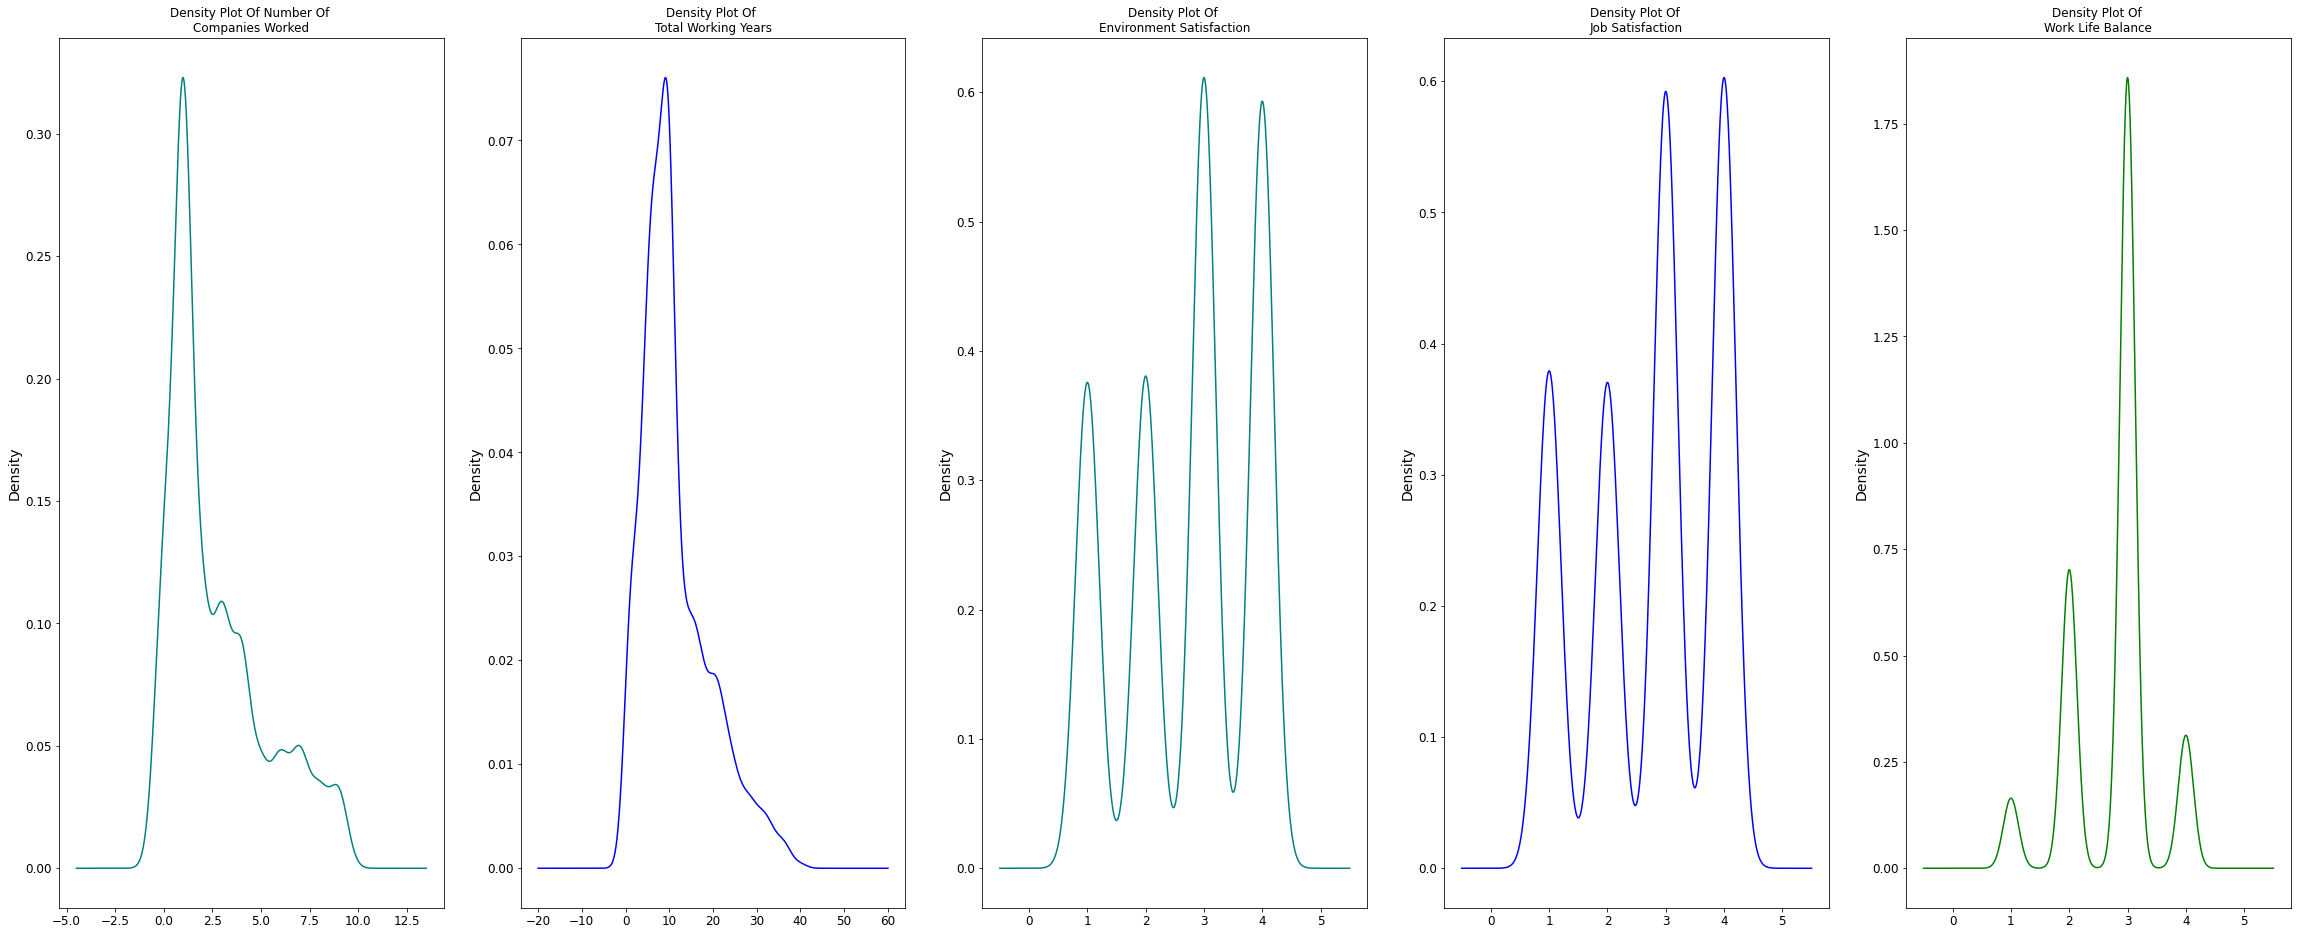

In [128]:
plt.figure(figsize=(40,16))

plt.subplot(1,5,1)
dataset['NumCompaniesWorked'].plot(kind='density', color='teal')
plt.title('Density Plot Of Number Of \nCompanies Worked')

plt.subplot(1,5,2)
dataset['TotalWorkingYears'].plot(kind='density', color='blue')
plt.title('Density Plot Of \nTotal Working Years')

plt.subplot(1,5,3)
dataset['EnvironmentSatisfaction'].plot(kind='density', color='teal')
plt.title('Density Plot Of \nEnvironment Satisfaction')

plt.subplot(1,5,4)
dataset['JobSatisfaction'].plot(kind='density', color='blue')
plt.title('Density Plot Of \nJob Satisfaction')

plt.subplot(1,5,5)
dataset['WorkLifeBalance'].plot(kind='density', color='green')
plt.title('Density Plot Of \nWork Life Balance')

plt.show()

In [129]:
dataset.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.691837,15.209524,8.0,...,11.277324,2.799320,7.008163,2.187755,4.123129,2.725170,2.729478,2.763492,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.493912,3.659108,0.0,...,7.774490,1.288978,6.125135,3.221699,3.567327,1.089852,1.098904,0.703541,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


## Test Pipeline	

In [130]:
dataset_pl = dataset.copy()
ds_num = dataset_pl.select_dtypes(include=[np.number])
ds_str = dataset_pl.select_dtypes(exclude=[np.number])

In [211]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

encoder = OrdinalEncoder()
encoder.fit(ds_str)
# dataset.head(10)

num_attribs = list(ds_num)
str_attribs = list(ds_str)

num_pipeline = Pipeline([
	('imputer', SimpleImputer(strategy="median")), 
	('std_scaler', StandardScaler()),			   
])

full_pipeline = ColumnTransformer([
	("num", num_pipeline, num_attribs),
	("str", encoder, str_attribs),
])



dataset_pipeline = full_pipeline.fit_transform(dataset_pl)
# dataset_pipeline

In [243]:
dataset_prepared = pd.DataFrame(
    dataset_pipeline,
    columns=list(dataset.columns)
)
#np.concatenate((num_attribs, encoder.get_feature_names(str_attribs)))
dataset_prepared

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1.541369,-0.393938,-0.891688,0.0,-1.731658,-0.961486,1.405136,-0.678464,-1.150554,0.0,...,0.379672,-0.426230,0.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0
1,-0.648668,0.099639,-1.868426,0.0,-1.730873,-0.961486,-0.491661,-1.079486,2.129306,0.0,...,-1.026167,2.346151,1.0,1.0,1.0,1.0,0.0,6.0,2.0,0.0
2,-0.539166,0.963398,1.061787,0.0,-1.730087,1.749610,2.725053,-0.678464,-0.057267,0.0,...,0.379672,-0.426230,0.0,1.0,1.0,4.0,1.0,7.0,1.0,0.0
3,0.117845,-0.887515,2.038524,0.0,-1.729302,0.845911,0.386301,0.123580,-1.150554,0.0,...,-1.026167,-0.426230,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
4,-0.539166,0.099639,-1.868426,0.0,-1.728516,-0.961486,-0.884109,0.524602,-0.877232,0.0,...,0.379672,-0.426230,0.0,2.0,1.0,3.0,1.0,7.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0.555852,-0.517332,1.061787,0.0,1.728516,-0.961486,-0.100700,0.123580,0.489376,0.0,...,0.379672,-0.426230,0.0,2.0,1.0,3.0,0.0,6.0,2.0,0.0
4406,-0.867672,-0.887515,1.061787,0.0,1.729302,-0.961486,-0.812504,-0.277442,-0.057267,0.0,...,-1.026167,-0.426230,0.0,2.0,1.0,3.0,1.0,2.0,0.0,0.0
4407,-1.305679,1.950552,-0.891688,0.0,1.730087,-0.057788,-0.595138,-1.079486,1.309341,0.0,...,0.379672,2.346151,0.0,2.0,1.0,1.0,1.0,7.0,1.0,0.0
4408,0.555852,1.086793,-0.891688,0.0,1.730873,-0.961486,-0.872210,-1.079486,-0.330589,0.0,...,-1.026167,-0.426230,0.0,2.0,2.0,3.0,1.0,2.0,0.0,0.0


In [244]:
import pandas as pd, numpy as np, seaborn as sns,matplotlib.pyplot as plt
useless_value = ['StandardHours','Education','EmployeeCount','EmployeeID', "Over18", "Gender", "Department"]
dataset_prepared = dataset_prepared.drop(useless_value, axis = 1)
dataset_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   float64
 1   Attrition                4410 non-null   float64
 2   BusinessTravel           4410 non-null   float64
 3   DistanceFromHome         4410 non-null   float64
 4   EducationField           4410 non-null   float64
 5   JobLevel                 4410 non-null   float64
 6   JobRole                  4410 non-null   float64
 7   MaritalStatus            4410 non-null   float64
 8   MonthlyIncome            4410 non-null   float64
 9   NumCompaniesWorked       4410 non-null   float64
 10  PercentSalaryHike        4410 non-null   float64
 11  StockOptionLevel         4410 non-null   float64
 12  TotalWorkingYears        4410 non-null   float64
 13  TrainingTimesLastYear    4410 non-null   float64
 14  YearsAtCompany          

In [245]:
# plt.figure(figsize = (50,40))   
# sns.heatmap(dataset_prepared.corr(),annot = True,cmap="tab20c")
# plt.show()

In [258]:
y = attrition
x = dataset_prepared
x.count(axis = 'BusinessTravel')

ValueError: No axis named BusinessTravel for object type DataFrame

In [247]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, stratify=y)

In [248]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

1.0
[[1110    0]
 [   0  213]]


In [249]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1110
           1       1.00      1.00      1.00       213

    accuracy                           1.00      1323
   macro avg       1.00      1.00      1.00      1323
weighted avg       1.00      1.00      1.00      1323



In [250]:
# import pandas as pd
# import numpy as np
# import statsmodels.api as sm
# from sklearn.linear_model import LogisticRegression


# lr = LogisticRegression(solver='liblinear')
# x_ = sm.add_constant(x)

# lr.fit(X_train,y_train)
# model = sm.Logit(y, x_)
# result = model.fit()

# y_pred = lr.predict(X_test)


In [251]:
corrmat = X_train.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
matrix= corrdf.sort_values(by = 'Correlation', ascending = False).head(50)
matrix

C:\Users\Kvendev\AppData\Local\Temp/ipykernel_25492/2583708761.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))


,Var1,Var2,Correlation
132,JobRole,Age,0.69
182,MonthlyIncome,JobRole,0.62
206,NumCompaniesWorked,MonthlyIncome,0.61
204,NumCompaniesWorked,JobRole,0.40
176,MonthlyIncome,Age,0.32
198,NumCompaniesWorked,Age,0.23
314,YearsAtCompany,JobRole,0.18
454,JobInvolvement,YearsAtCompany,0.16
308,YearsAtCompany,Age,0.16
316,YearsAtCompany,MonthlyIncome,0.14


In [252]:
import statsmodels.api as sm

# Logistic regression model
correlated = ["Gender_Male", "Department_Sales", "PerformanceRating", "PercentSalaryHike", "Department_Research & Development", "Gender_Female"]

logm1 = sm.Logit(y_train,(sm.add_constant(X_train)))
logm1.fit(maxiter=10000).summary()

K:\Users\Kvendev\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


PerfectSeparationError: Perfect separation detected, results not available

# Indicateurs de qualité

In [231]:
print('Accuracy score of Logistic Regression:' + str(accuracy_score(y_test,y_pred)))
print('Confusion Matrix\n' + str(confusion_matrix(y_test, y_pred)))

Accuracy score of Logistic Regression:1.0
Confusion Matrix
[[1110    0]
 [   0  213]]


In [235]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4410
Model:                          Logit   Df Residuals:                     4372
Method:                           MLE   Df Model:                           37
Date:                Tue, 15 Mar 2022   Pseudo R-squ.:                     inf
Time:                        15:58:14   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.7470        nan        nan        nan         nan         nan
Age                                  -0.2671      0.066     -4.077      0.000      -0.396      -0.139
DistanceFromHome                     -0.0271      0.047     -0.579      0.563      -0.119       0.065
JobLevel                             -0.0616      0.047     -1.321      0.187      -0.153       0.030
MonthlyIncome                        -0.0509      0.047     -1.089      0.276      -0.142       0.041
NumCompaniesWorked                    0.3391      0.049      6.956      0.000       0.244       0.435
PercentSalaryHike                     0.0504      0.072      0.696      0.487      -0.092       0.192
StockOptionLevel                     -0.0848      0.047     -1.812      0.070      -0.177       0.007
TotalWorkingYears                    -0.6155      0.102     -6.030      0.000      -0.816      -0.415
TrainingTimesLastYear                -0.2141      0.048     -4.477      0.000      -0.308      -0.120
YearsAtCompany                        0.1941      0.119      1.627      0.104      -0.040       0.428
YearsSinceLastPromotion               0.4984      0.069      7.201      0.000       0.363       0.634
YearsWithCurrManager                 -0.6010      0.086     -7.024      0.000      -0.769      -0.433
EnvironmentSatisfaction              -0.3519      0.045     -7.813      0.000      -0.440      -0.264
JobSatisfaction                      -0.3694      0.046     -8.058      0.000      -0.459      -0.280
WorkLifeBalance                      -0.2499      0.044     -5.637      0.000      -0.337      -0.163
JobInvolvement                       -0.0879      0.045     -1.946      0.052      -0.176       0.001
PerformanceRating                     0.0379      0.070      0.539      0.590      -0.100       0.175
BusinessTravel_Non-Travel            -0.9964        nan        nan        nan         nan         nan
BusinessTravel_Travel_Frequently      0.5358        nan        nan        nan         nan         nan
BusinessTravel_Travel_Rarely         -0.2864        nan        nan        nan         nan         nan
Department_Human Resources            0.1129        nan        nan        nan         nan         nan
Department_Research & Development    -0.3877        nan        nan        nan         nan         nan
Department_Sales                     -0.4723        nan        nan        nan         nan         nan
EducationField_Human Resources        0.7538        nan        nan        nan         nan         nan
EducationField_Life Sciences         -0.0808        nan        nan        nan         nan         nan
EducationField_Marketing             -0.2640        nan        nan        nan         nan         nan
EducationField_Medical               -0.1691        nan        nan        nan         nan         nan
EducationField_Other                 -0.5610        nan        nan        nan  

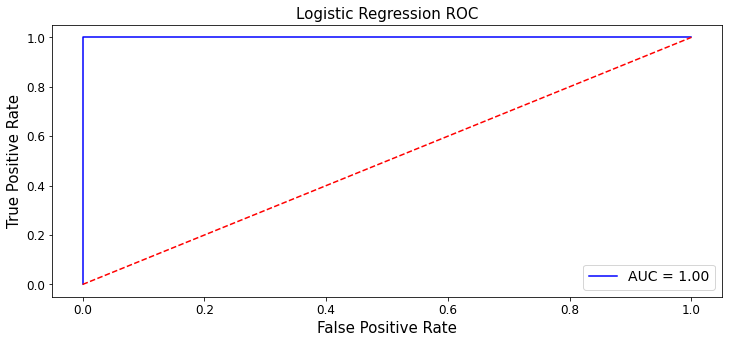

In [233]:
from sklearn import metrics

plt.figure(figsize=(12,5))

lrprob = lr.predict_proba(X_test)
lr_pred = lrprob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, lr_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Logistic Regression ROC', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

plt.show()



In [234]:
from sklearn.metrics import classification_report
print('Logistic Regression\n',classification_report(y_test, y_pred))

Logistic Regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1110
           1       1.00      1.00      1.00       213

    accuracy                           1.00      1323
   macro avg       1.00      1.00      1.00      1323
weighted avg       1.00      1.00      1.00      1323

